# 3 Data Preprocessing<a id='3_Data_Preprocessing'></a>

## 3.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Objective of Data Wrangling](#2.2.2_Objective_of_Data_Wrangling)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
  * [2.5 Explore The Data](#2.5_Explore_The_Data)
    * [2.5.1 Find Duplicates](#2.5.1_Find_Duplicates)
    * [2.5.2 Find Missing Values](#2.5.2_Find_Missing_Values)
    * [2.5.3 Find Dimensions for Time Series](#2.5.3_Find_Dimensions_for_Time_Series)
      * [2.5.3.1 Total Number of Time Series](#2.5.3.1_Total_Number_of_Time_Series)
      * [2.5.3.2 Time Span of Time Series](#2.5.3.2_Time_Span_of_Time_Series)
        * [2.5.3.2.1 Time Span of Time Series in Weekly_sales Dataframe](#2.5.3.2.1_Time_Span_of_Time_Series_in_Weekly_sales_Dataframe)
        * [2.5.3.2.2 Time Span of Time Series in Features Dataframe](#2.5.3.2.2_Time_Span_of_Time_Series_in_Features _Dataframe)
    * [2.5.4 Time Trend of Weekly Sales](#2.5.4_Time_Trend_of_Weekly_Sales)
      * [2.5.4.1 Time Trend of Weekly Sales for Dept](#2.5.4.1_Time_Trend_of_Weekly_Sales_for_Dept)
      * [2.5.4.2 Completeness of Weekly Sales Records](#2.5.4.2_Completeness_of_Weekly_Sales_Records)
    * [2.5.5 Categorical Features](#2.5.5_Categorical_Features)
      * [2.5.5.1 Store Type](#2.5.5.1_Store_Type)
        * [2.5.5.1.1 Store Size for Different Store Type](#2.5.5.1.1_Store_Size_for_Different_Store_Type)
        * [2.5.5.1.2 Weekly Sales for Different Store Type](#2.5.5.1.2_Weekly_Sales_for_Different_Store_Type)
      * [2.5.5.2 Holiday Effect](#2.5.5.2_Holiday_Effect)
    * [2.5.6 Numerical Features](#2.5.6_Numerical_Features)
      * [2.5.6.1 Numerical Variables in features df](#2.5.6.1_Numerical_Variables_in_Features_df)
        * [2.5.6.1.1 Numerical Variables Summary](#2.5.6.1.1_Numerical_Variables_Summary)
        * [2.5.6.1.2 Numerical Variables Distribution](#2.5.6.1.2_Numerical_Variables_Distribution)
      * [2.5.6.2 Numerical Variables in weekly_sales_type df](#2.5.6.2_Numerical_Variables_in_Weekly_Sales_Type_df)
  * [2.6 Merge The Data](#2.6_Merge_The_Data)
  * [2.7 Save The dData](#2.7_Save_The_data)
  * [2.8 Summary](#2.8_Summary)


## 3.2 Objectives<a id='3.2_Objectives'></a>

2. Image preprocessing 
    
    1) Image normalization due to various image intensity 
    
    2) noise reduction technique - guassian blurring
    
    3) image augmentation
    
    4) ROI selection?
    

3. feature extraction
    1) statistical features like intensity mean, standard deviation, skewness, and kurtosis from the pixel intensity distributions.
 
    2) Shape and Contour Features: Hough Transform for detecting shapes in the X-ray which might be indicative of particular conditions.
    
    3) texture/orientation features: Gabor Filters
    
    4) deep learning CNNs
  
4. sample imbalance
   1) number in different cases are largely different, data imbalance might be a concern
    

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
#import libs  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, Flatten,BatchNormalization, Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob


import seaborn as sns
import os

import cv2
from sklearn.model_selection import train_test_split



## 3.4 Test_Train_split<a id='3.4_Test_Train_split'></a>

In [2]:
categories = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']  # List of categories

# Set a random seed for reproducibility
seed = 42

# Define a split ratio
train_ratio = 0.7
validation_ratio = 0.1
test_ratio = 0.2 

# Define the base directories for train and test sets
base_train_dir = 'train'
base_validation_dir = 'validation'
base_test_dir = 'test'

# Create train and test directories if they don't exist
if not os.path.exists(base_train_dir):
    os.makedirs(base_train_dir)
    
if not os.path.exists(base_validation_dir):
    os.makedirs(base_validation_dir)

if not os.path.exists(base_test_dir):
    os.makedirs(base_test_dir)

for category in categories:
    # Create category subdirectories in train and test directories
    train_category_dir = os.path.join(base_train_dir, category)
    validation_category_dir = os.path.join(base_validation_dir, category)
    test_category_dir = os.path.join(base_test_dir, category)

    if not os.path.exists(train_category_dir):
        os.makedirs(train_category_dir)
        
    if not os.path.exists(validation_category_dir):
        os.makedirs(validation_category_dir)
    
    if not os.path.exists(test_category_dir):
        os.makedirs(test_category_dir)

    # Get the list of images from the first subdirectory of the category
    subfolders = [d for d in os.listdir(category) if os.path.isdir(os.path.join(category, d))]  
    first_subfolder = os.path.join(category, subfolders[0])
    if os.path.isdir(first_subfolder):
        images = [img for img in os.listdir(first_subfolder) if img.endswith('.png')]

    # Train-test split for the current category
     # Select only 10% of images to use for this category
    _, use_images = train_test_split(images, test_size=0.1, random_state=seed)
    train_val_images, test_images = train_test_split(use_images, test_size=test_ratio, random_state=seed)
    train_images, val_images = train_test_split(train_val_images, test_size=validation_ratio/(train_ratio+validation_ratio), random_state=seed)

    # Move images to their respective train/test category directories
    for img in train_images:
        source = os.path.join(category, subfolders[0], img)
        destination = os.path.join(train_category_dir, img)
        shutil.move(source, destination)
        
    for img in val_images:
        source = os.path.join(category, subfolders[0], img)
        destination = os.path.join(validation_category_dir, img)
        shutil.move(source, destination)

    for img in test_images:
        source = os.path.join(category, subfolders[0], img)
        destination = os.path.join(test_category_dir, img)
        shutil.move(source, destination)



## 3.5 Image preprocessing

In [3]:
#generate data which can be put in sequential model 

#function for preprocessing the image in the same format of VGG16
#VG16, substract mean RGB value from each pixel
Image_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

#creat batches of data from directory where train,val,test dataset are, target_size are set as 224 since pre-trained model VGG16 is using image with size of 224
train_batches=Image_generator.flow_from_directory(directory=base_train_dir,target_size=(224,224), classes=['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity'],batch_size=10)
val_batches=Image_generator.flow_from_directory(directory=base_validation_dir,target_size=(224,224), classes=['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity'],batch_size=10)
#only set shuffle to be false for test dataset since we need to use test dataset as reference for confusion matrix where
test_batches=Image_generator.flow_from_directory(directory=base_test_dir,target_size=(224,224), classes=['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity'],batch_size=10,shuffle=False)


Found 4005 images belonging to 4 classes.
Found 581 images belonging to 4 classes.
Found 1154 images belonging to 4 classes.


In [4]:
#each batch contains 10 images and corresponding labels
imgs,labels=next(train_batches)

In [5]:
def adjustImages(image):
    min_val=np.min(img)
    max_val=np.max(img)
    adjusted_img=(img-min_val)/(max_val-min_val)
    return adjusted_img

In [6]:
num_images=imgs.shape[0]

In [7]:
num_images

10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

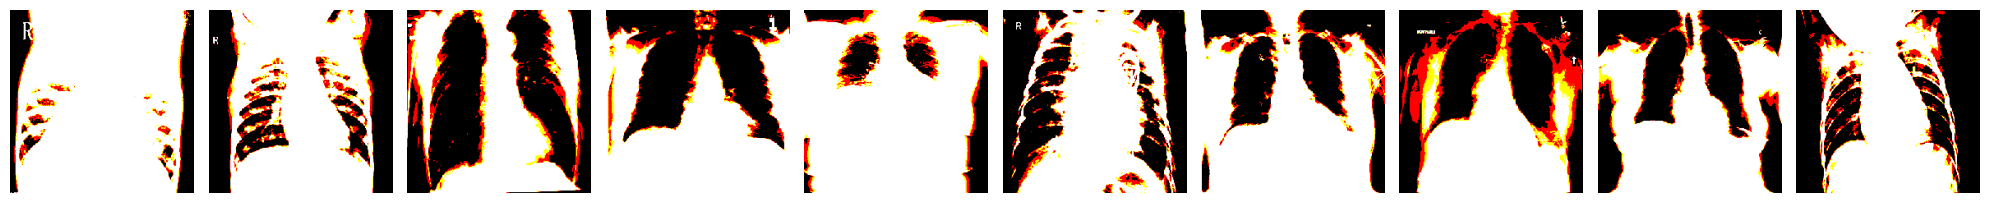

In [8]:
fig,axes=plt.subplots(1,num_images,figsize=(20,5))

    
for i,ax in enumerate(axes):
        
    ax.imshow(imgs[i])
    ax.axis('off')
    plt.tight_layout()
#    ax.set_title(f"label:{np.argmax(label[i])}")
plt.tight_layout()
plt.show()

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> None

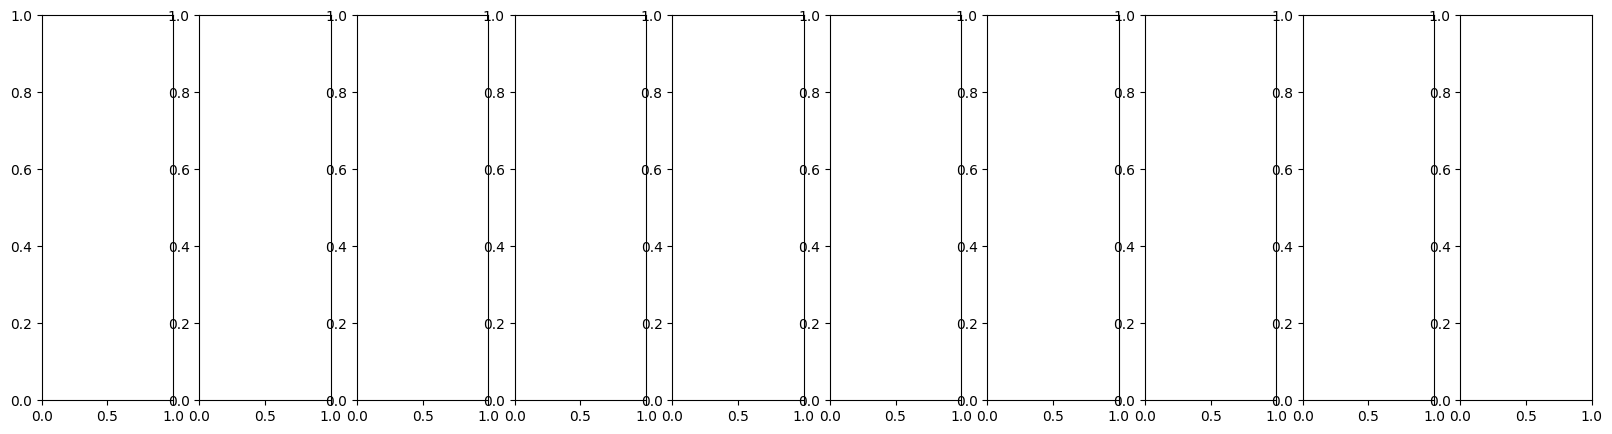

In [9]:
fig,axes=plt.subplots(1,num_images,figsize=(20,5))

    
for i,ax in enumerate(axes):
        
    ax.imshow(adjustImages(imgs[i]))
    ax.axis('off')
    plt.tight_layout()
#    ax.set_title(f"label:{np.argmax(label[i])}")
plt.tight_layout()
plt.show()

## 3.6 build CNN model

In [10]:
CNN_model=Sequential([Conv2D(filters=16, kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
                      MaxPool2D(pool_size=(2,2),strides=2),
                      Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same'),
                      MaxPool2D(pool_size=(2,2),strides=2),
                      Flatten(),
                      Dense(units=4,activation='softmax')])

In [11]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4)                 4

In [12]:
CNN_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
CNN_model.fit(x=train_batches,validation_data=val_batches,epochs=10,verbose=1)

Epoch 1/10
401/401 [==============================] - 33s 82ms/step - loss: 6.3486 - accuracy: 0.6424 - val_loss: 1.3829 - val_accuracy: 0.7315
Epoch 2/10
401/401 [==============================] - 32s 79ms/step - loss: 0.7918 - accuracy: 0.8040 - val_loss: 1.0006 - val_accuracy: 0.7418
Epoch 3/10
401/401 [==============================] - 32s 81ms/step - loss: 0.2689 - accuracy: 0.9021 - val_loss: 1.3124 - val_accuracy: 0.6954
Epoch 4/10
401/401 [==============================] - 32s 80ms/step - loss: 0.1025 - accuracy: 0.9655 - val_loss: 1.1705 - val_accuracy: 0.7212
Epoch 5/10
401/401 [==============================] - 32s 80ms/step - loss: 0.0739 - accuracy: 0.9738 - val_loss: 1.0503 - val_accuracy: 0.7349
Epoch 6/10
401/401 [==============================] - 32s 80ms/step - loss: 0.0338 - accuracy: 0.9915 - val_loss: 1.0754 - val_accuracy: 0.7504
Epoch 7/10
401/401 [==============================] - 32s 80ms/step - loss: 0.0383 - accuracy: 0.9888 - val_loss: 1.0924 - val_accuracy:

## 3.7 Predict the Image 

In [14]:
test_batches.classes

array([0, 0, 0, ..., 3, 3, 3])

In [15]:
test_imgs,test_labels=next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

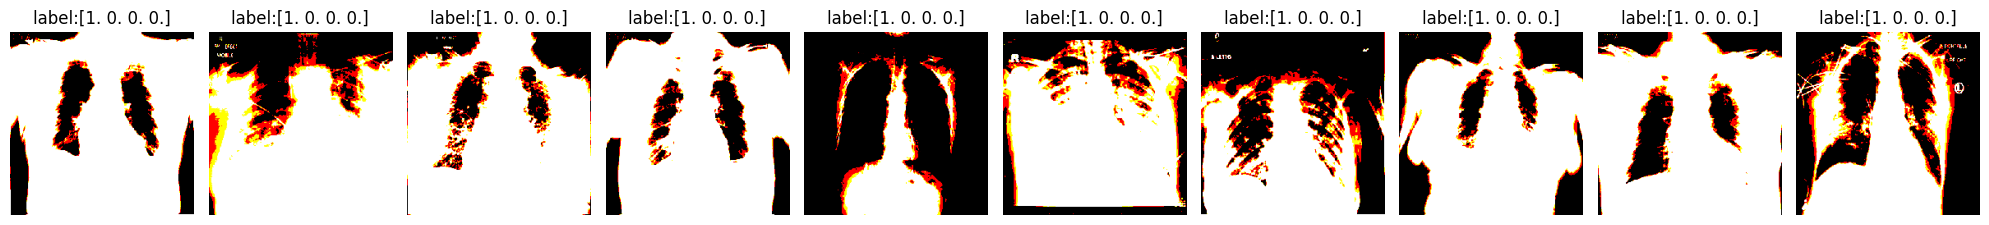

In [16]:
fig,axes=plt.subplots(1,num_images,figsize=(20,5))

    
for i,ax in enumerate(axes):
        
    ax.imshow(test_imgs[i])
    ax.axis('off')
    plt.tight_layout()
    ax.set_title(f"label:{test_labels[i]}")
plt.tight_layout()
plt.show()

In [17]:
predictions=CNN_model.predict(x=test_batches,verbose=0)

In [18]:
np.round(predictions)[:10]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [19]:
confusion_matrix=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=1))

In [20]:
test_batches.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2, 'Lung_Opacity': 3}

In [21]:
class_names=['COVID','Normal','Viral Pneumonia','Lung_Opacity']

In [22]:
def CM_plot(confusion_matrix, color):
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap=color,xticklabels=class_names,yticklabels=class_names)
    plt.title('Confusion Matrix')
   
    #tick_marks=np.arrange(len(classes))
    plt.xlabel=('True Label')
    plt.ylabel=('Predicted Label')
    plt.show()
    
   

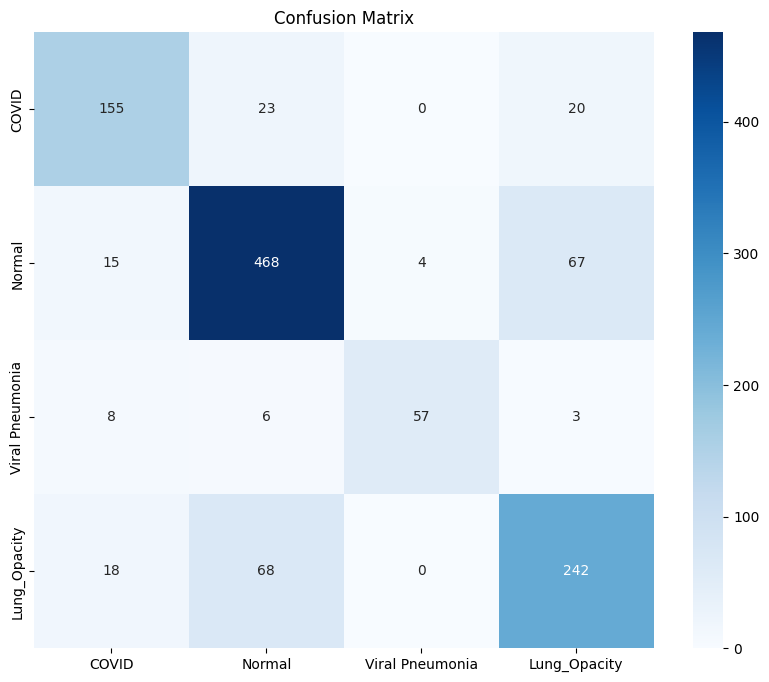

In [23]:
CM_plot(confusion_matrix, "Blues")

## 3.8 tranfer learning